In [1]:
#Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Loading Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #vizualization
import matplotlib.pyplot as plt #vizualization
from matplotlib import cm

import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.utils import shuffle

# Data Loading
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Exploratory analysis

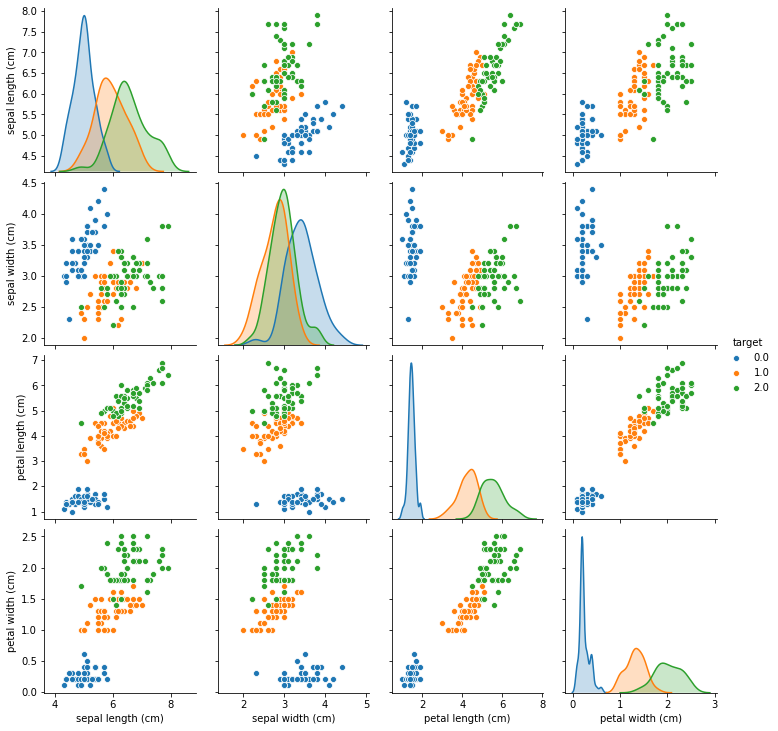

In [6]:
sns.pairplot(data=data[data.columns[0:6]], hue='target')
plt.show()

## Heatmap

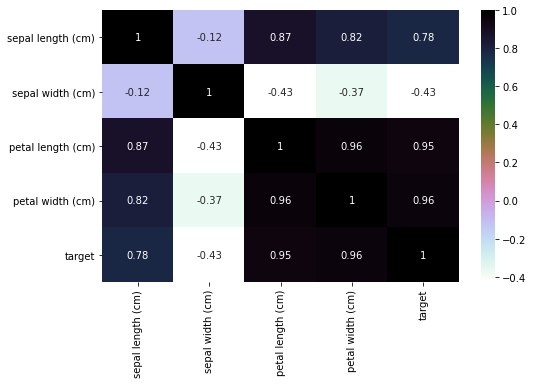

In [7]:
plt.figure(figsize=(8,5)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

#### From the plot, we can say that the Petal Width and Length are highly correlated

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


#### Now, lets shuffle the data

In [9]:
data = shuffle(data)

In [10]:
X=data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
target=data[['target']]
y_true=target.copy()

In [11]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
136,6.3,3.4,5.6,2.4
119,6.0,2.2,5.0,1.5
5,5.4,3.9,1.7,0.4
1,4.9,3.0,1.4,0.2
148,6.2,3.4,5.4,2.3
...,...,...,...,...
7,5.0,3.4,1.5,0.2
16,5.4,3.9,1.3,0.4
86,6.7,3.1,4.7,1.5
11,4.8,3.4,1.6,0.2


In [12]:
target

,target
136,2.0
119,2.0
5,0.0
1,0.0
148,2.0
...,...
7,0.0
16,0.0
86,1.0
11,0.0


### Train the model

In [13]:
X = StandardScaler().fit_transform(X)
target = LabelBinarizer().fit_transform(target)

In [14]:
target

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0,

#### Dividing the Data into train and test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 101)

#### Model

In [16]:
model = Sequential()
model.add(Dense( 12, input_dim=4, activation = 'relu'))
model.add(Dense( units = 15, activation= 'relu'))
model.add(Dense( units = 8, activation= 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 120, validation_data = (x_test, y_test))

Epoch 1/120
4/4 [==============================] - 1s 180ms/step - loss: 1.0619 - accuracy: 0.5667 - val_loss: 1.0789 - val_accuracy: 0.5667
Epoch 2/120
4/4 [==============================] - 0s 10ms/step - loss: 1.0325 - accuracy: 0.7667 - val_loss: 1.0590 - val_accuracy: 0.6333
Epoch 3/120
4/4 [==============================] - 0s 9ms/step - loss: 1.0051 - accuracy: 0.8583 - val_loss: 1.0390 - val_accuracy: 0.7000
Epoch 4/120
4/4 [==============================] - 0s 12ms/step - loss: 0.9781 - accuracy: 0.9000 - val_loss: 1.0198 - val_accuracy: 0.8000
Epoch 5/120
4/4 [==============================] - 0s 10ms/step - loss: 0.9504 - accuracy: 0.9000 - val_loss: 0.9964 - val_accuracy: 0.9000
Epoch 6/120
4/4 [==============================] - 0s 10ms/step - loss: 0.9213 - accuracy: 0.9000 - val_loss: 0.9711 - val_accuracy: 0.9333
Epoch 7/120
4/4 [==============================] - 0s 10ms/step - loss: 0.8892 - accuracy: 0.9083 - val_loss: 0.9453 - val_accuracy: 0.9333
Epoch 8/120
4/4 [===

4/4 [==============================] - 0s 10ms/step - loss: 0.0343 - accuracy: 0.9917 - val_loss: 0.2434 - val_accuracy: 0.8667
Epoch 116/120
4/4 [==============================] - 0s 9ms/step - loss: 0.0341 - accuracy: 0.9917 - val_loss: 0.2378 - val_accuracy: 0.8667
Epoch 117/120
4/4 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9917 - val_loss: 0.2366 - val_accuracy: 0.8667
Epoch 118/120
4/4 [==============================] - 0s 9ms/step - loss: 0.0338 - accuracy: 0.9917 - val_loss: 0.2155 - val_accuracy: 0.8667
Epoch 119/120
4/4 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.9917 - val_loss: 0.2147 - val_accuracy: 0.8667
Epoch 120/120
4/4 [==============================] - 0s 12ms/step - loss: 0.0327 - accuracy: 0.9917 - val_loss: 0.2258 - val_accuracy: 0.8667


#### Predicting Targets for test data from the model trained on train data

In [17]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


#### Model Preformance 

In [18]:
y_test

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [19]:
y_test=np.argmax(y_test, axis=1)

In [20]:
y_test

array([2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2,
       0, 2, 1, 2, 2, 1, 2, 2], dtype=int64)

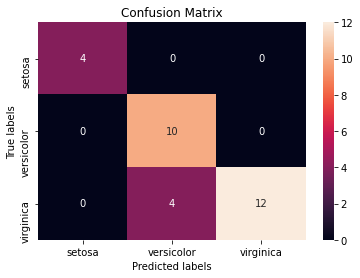

In [21]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test.tolist(), y_pred.tolist())

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']); ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']);

In [22]:
from sklearn.metrics import precision_recall_fscore_support

In [23]:
precision_recall_fscore_support(y_test.tolist(), y_pred.tolist(), average='macro')

(0.9047619047619048, 0.9166666666666666, 0.8968253968253967, None)

### Plotting Accuracy and Loss

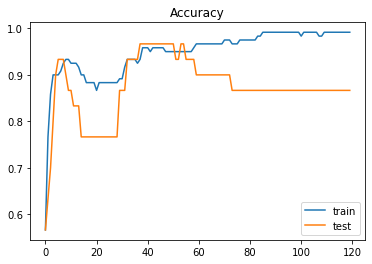

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

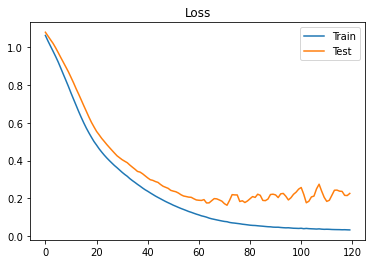

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()